# Entrenamiento conjuntos globales

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Se optó por construir los folds previamente utilizando Weka utilzando un filtro que nos garantiza que estos fueron construidos con un proceso de muestreo samplificado

In [2]:
# Abrimos los .csv del fold

training_set = pd.read_csv("./diabetes_balanced_train.csv")
test_set = pd.read_csv("./diabetes_balanced_test.csv")

In [3]:
# Variables en común usadas en todos los entrenamientos

# Número de instancias por pliegue. Todos los folds tienen un número igual
# de instancias positivas y negativas.
attributes = training_set.columns[:-1]
class_attribute = training_set.columns[-1]
class_attribute_name = training_set[training_set.columns[-1]].drop_duplicates()

positive_count, negative_count = training_set.groupby([class_attribute])[class_attribute].count()


print(attributes)
print(class_attribute)
print(class_attribute_name)
print(positive_count)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')
class
0    tested_positive
2    tested_negative
Name: class, dtype: object
800


## Entrenamiento con fold 1

### Exploración de número de neuronas

In [13]:
from sklearn.neural_network import MLPClassifier

last_expermient_no = 0 # Número del último experimento conducido
init_neurons = (len(attributes)+len(class_attribute_name)) // 2
hidden_layer_sizes = (init_neurons) # Número de neuronas/capas
epochs = 1
learning_rate = 0
momentum = 0


results = []

for neurons_count in range(init_neurons, (init_neurons*2) + 3, 1):
    print(f"================{neurons_count} neurons===================")
    hidden_layer_sizes = (neurons_count) 
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set[attributes]
    train_class_values = training_set[class_attribute]

    test_attribute_values = test_set[attributes]
    test_class_values = test_set[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")
    #last_expermient_no += 1
    #results.append([])


# Escribir los resultados a un .csv para llevar record de los expermientos
#experiments_fold_1 = pd.read_csv('experiments_fold_1.csv')
#for result in results:
#    experiments_fold_1.loc[len(experiments_fold_1)] = result
#experiments_fold_1.to_csv('experiments_fold_1.csv', index=False)


================5 neurons===================
acc=0.77
training_accuracy = 0.75375
test_accuracy = 0.77
================6 neurons===================
acc=0.5525
training_accuracy = 0.55375
test_accuracy = 0.5525
================7 neurons===================
acc=0.715
training_accuracy = 0.706875
test_accuracy = 0.715
================8 neurons===================
acc=0.7575
training_accuracy = 0.7375
test_accuracy = 0.7575
================9 neurons===================
acc=0.725
training_accuracy = 0.72875
test_accuracy = 0.725
================10 neurons===================
acc=0.7625
training_accuracy = 0.75375
test_accuracy = 0.7625
================11 neurons===================
acc=0.745
training_accuracy = 0.74875
test_accuracy = 0.745
================12 neurons===================
acc=0.78
training_accuracy = 0.761875
test_accuracy = 0.78


Al hacer esta prueba, las ventaje de la topología con 8 y 10 neuronas no era tan evidente, ya que la topologías de 5 y 12 neuronas también presentan un buen accuracy y una disparidad entre los dos accuracies que podría estar en rango. Por lo tanto, probaré topologías con 5, 8, 10, y 12 neuronas para este experimento, porque tal vez tomando los conjuntos globales se vuelven evidentes patrones usando más neuronas. 

### Experimentación número de capas ocultas

In [14]:
last_expermient_no = 0 # Número del último experimento conducido
epochs = 1
learning_rate = 0
momentum = 0

results = []

hidden_layer_sizes = []

for n in (5, 8, 10, 12):
    hidden_layer_sizes = []
    for _ in range(1, 6, 1):
        hidden_layer_sizes.append(n)
        print(f"================layers = {hidden_layer_sizes}===================")
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=hidden_layer_sizes,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set[attributes]
        train_class_values = training_set[class_attribute]

        test_attribute_values = test_set[attributes]
        test_class_values = test_set[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)
        # record training set accuracy and error
        training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
        training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
        # record generalization accuracy and error
        test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
        test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
        #print(report)
        print(f"acc={report_dict['accuracy']}")
        print(f"training_accuracy = {training_accuracy}")
        print(f"test_accuracy = {test_accuracy}")


================layers = [5]===================
acc=0.77
training_accuracy = 0.75375
test_accuracy = 0.77
================layers = [5, 5]===================
acc=0.755
training_accuracy = 0.7325
test_accuracy = 0.755
================layers = [5, 5, 5]===================
acc=0.77
training_accuracy = 0.754375
test_accuracy = 0.77
================layers = [5, 5, 5, 5]===================
acc=0.77
training_accuracy = 0.77125
test_accuracy = 0.77
================layers = [5, 5, 5, 5, 5]===================
acc=0.805
training_accuracy = 0.79125
test_accuracy = 0.805
================layers = [8]===================
acc=0.7575
training_accuracy = 0.7375
test_accuracy = 0.7575
================layers = [8, 8]===================
acc=0.62
training_accuracy = 0.626875
test_accuracy = 0.62
================layers = [8, 8, 8]===================
acc=0.7875
training_accuracy = 0.78375
test_accuracy = 0.7875
================layers = [8, 8, 8, 8]===================
acc=0.79
training_accuracy = 0.789375
test_a

Al análizar cada uno de los resultados para las distintas topologías, nuevamente no queda claro cuál es la indicada.

Sin embargo, se pueden descartar las topologías de 5 capas ocultas , porque a pesar de tener un buen accuracy hay otras topologías menos complejas que alcanzan resultados similares.

Por otro lado, se descartan todas las topologías que tengan un accuracy menor a 0.77 y la topología [12,12,12,12] ya que hay varias topologías que cumplen con este griterio y son estas las que se usarán en el siguiente experimento.

### Experimentación número de épocas

################## layers = [5] ########################
---------------------- epochs = 10 -----------------------
New best acc: 0.439375 with 10 epochs
acc=0.4275
---------------------- epochs = 20 -----------------------
New best acc: 0.68 with 20 epochs
acc=0.7025
---------------------- epochs = 30 -----------------------
New best acc: 0.716875 with 30 epochs
acc=0.73
---------------------- epochs = 40 -----------------------
New best acc: 0.715 with 40 epochs
acc=0.7175
---------------------- epochs = 50 -----------------------
New best acc: 0.7275 with 50 epochs
acc=0.75
---------------------- epochs = 60 -----------------------
New best acc: 0.725625 with 60 epochs
acc=0.7475
---------------------- epochs = 70 -----------------------
New best acc: 0.74375 with 70 epochs
acc=0.7675
---------------------- epochs = 80 -----------------------
New best acc: 0.744375 with 80 epochs
acc=0.7625
---------------------- epochs = 90 -----------------------
New best acc: 0.76 with 90 epochs


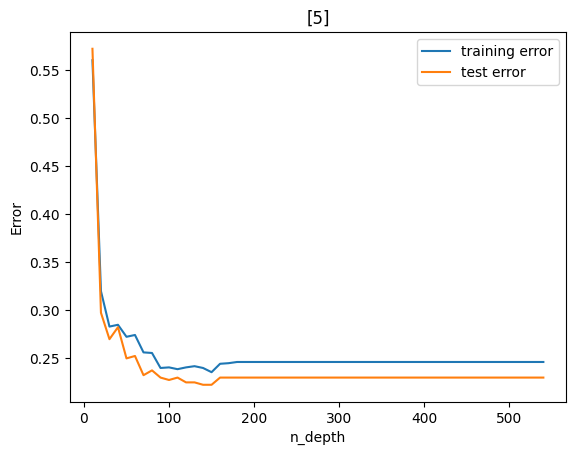

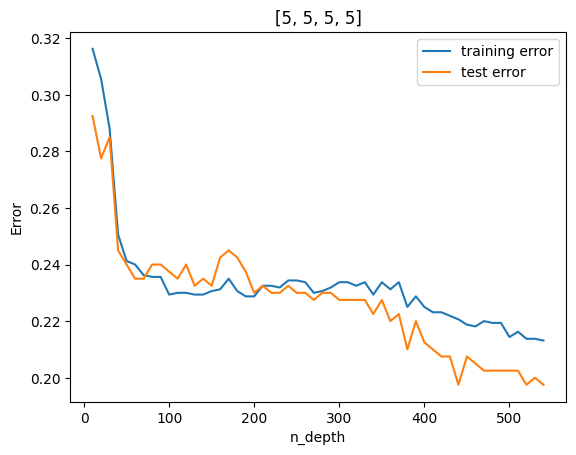

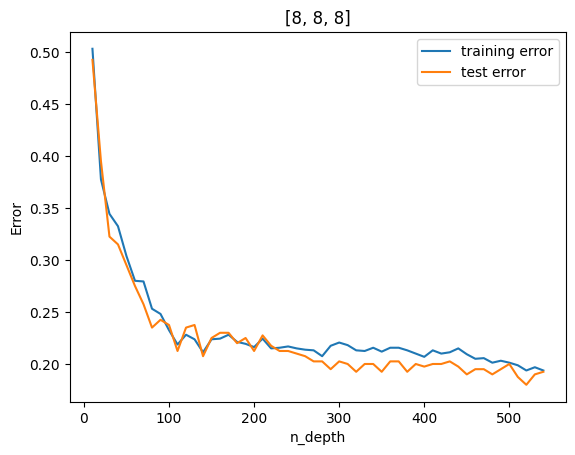

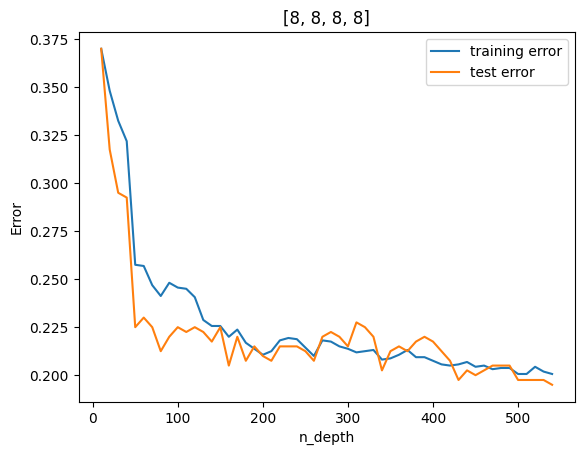

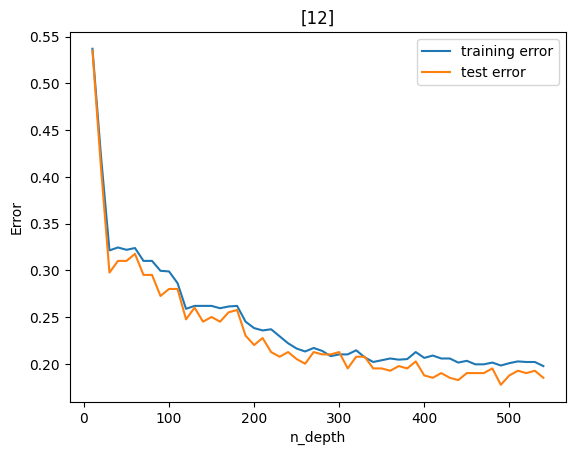

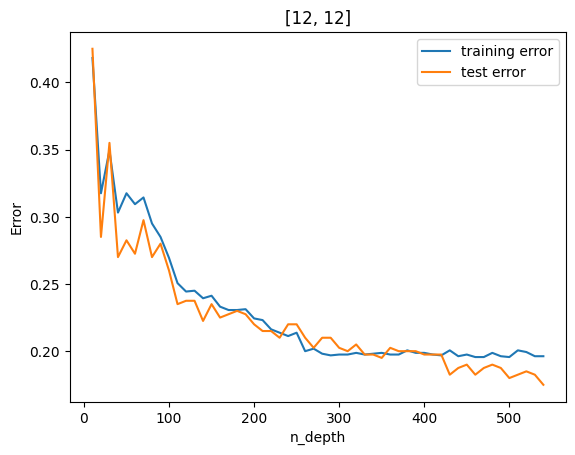

In [15]:
import matplotlib.pyplot as plt

last_expermient_no = 0 # Número del último experimento conducido
learning_rate = 0
momentum = 0

results = []

# Primera ronda [5], [5,5,5,5],[8,8,8], [8,8,8,8], [12], [12,12]
topologies = [[5], [5,5,5,5],[8,8,8], [8,8,8,8], [12], [12,12]] 
epochs = range(10, 550, 10) # La granulaidad fue cambiando conforme la experimentación

for topology in topologies:
    print(f"################## layers = {topology} ########################")
    
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []
    
    for epoch in epochs:
        print(f"---------------------- epochs = {epoch} -----------------------")
        best_acc = -1
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=topology,
                        max_iter = epoch,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set[attributes]
        train_class_values = training_set[class_attribute]

        test_attribute_values = test_set[attributes]
        test_class_values = test_set[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)

        training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
        training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))

        if training_accuracy[-1] > best_acc:
            print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
            best_acc = training_accuracy[-1]

        test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
        test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
        print(f"acc={report_dict['accuracy']}")

    plt.figure()
    plt.title(str(topology))
    plt.plot(epochs, training_error, label="training error")
    plt.plot(epochs, test_error, label="test error")
    plt.ylabel("Error")
    plt.xlabel("n_depth")
    plt.legend()

### Primera ronda

range(10, 550, 10)

Como podemos ver, en prácticamente todas las gráficas es complicado decir el punto de overfitting ya que algunas presentan la característica de que el error sobre el conjunto training es superior al error sobre el conjunto test.

Sin embargo, tras varias corridas, se descartaron las topologías [5,5,5,5], [8,8,8,8], [12,12] por su error relativamente alto si se le compara con otras topologías que llegaron a un mejor error con menos épocas

### Segunda ronda
range(100, 650, 10)

De la segunda ronda, se descarta las topologías [5] por tener el accuracy más bajo y estancarse rapidamente en su aprendizaje.

Se descartaron también la topología [12] por requerir muchas épocas para llegar a un error que otras topologías llegan más rápido.

Esto nos deja con las topología [8,8,8].


### Experimentos variando learning rate y momentum

NOTA: MLPClassifier ignora los parámetros de learning rate y momentum
cuando se usa el solver lbfgs. Cambié momentariamente a sgd para probar si de esta
forma mejoraba el performance con sgd, pero como se puede observar, no fue el caso.

================LR: 0.1 mom=0.3=======================
New best acc: 0.5075 with 10 epochs
New best acc: 0.50875 with 15 epochs
New best acc: 0.554375 with 20 epochs
New best acc: 0.564375 with 25 epochs
New best acc: 0.590625 with 30 epochs
New best acc: 0.6 with 35 epochs
New best acc: 0.618125 with 40 epochs
New best acc: 0.621875 with 45 epochs
New best acc: 0.64375 with 50 epochs
================LR: 0.1 mom=0.6=======================
New best acc: 0.569375 with 10 epochs
================LR: 0.1 mom=0.9=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.3=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.6=======================
New best acc: 0.5 with 10 epochs
================LR: 0.3 mom=0.9=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.3=======================
New best acc: 0.5 with 10 epochs
================LR: 0.5 mom=0.6=======================
New best acc: 0.5 with 1

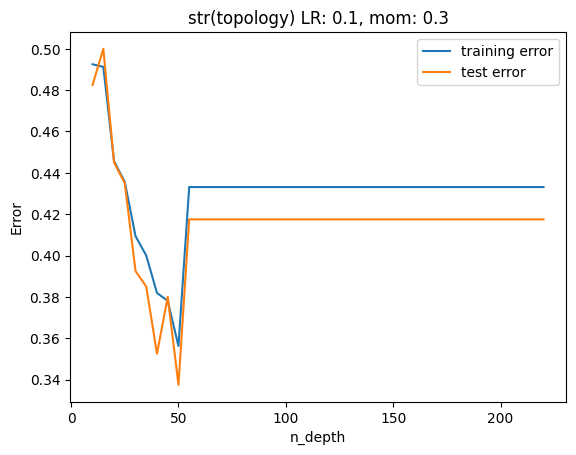

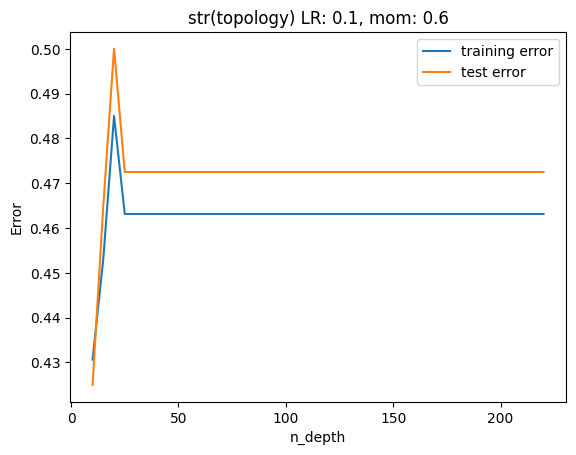

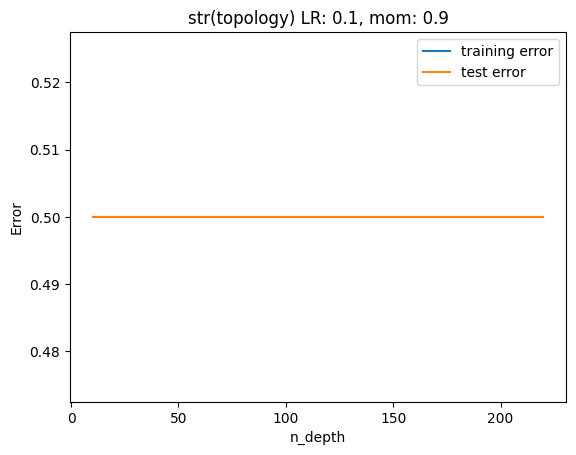

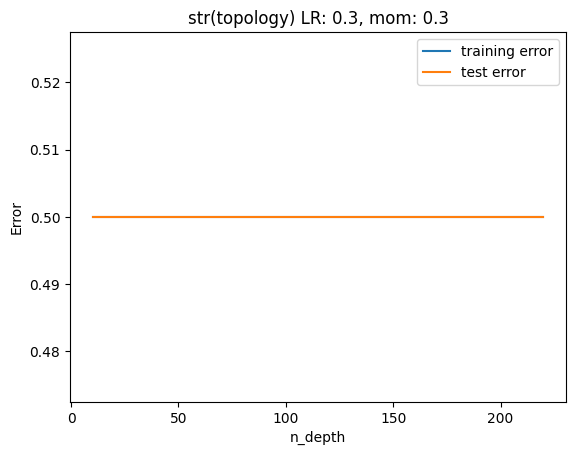

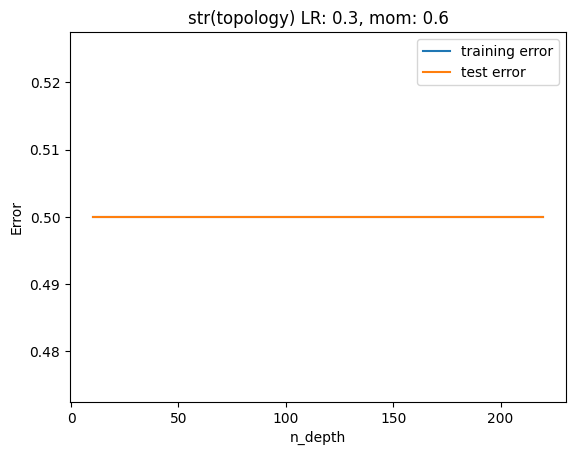

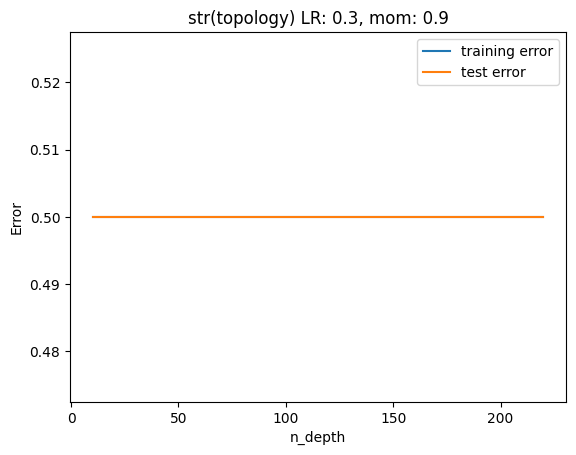

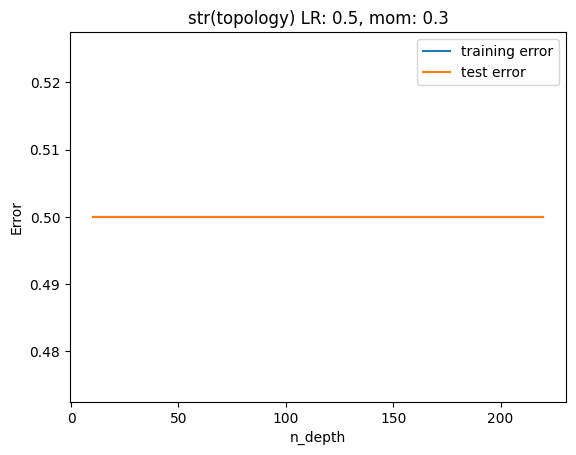

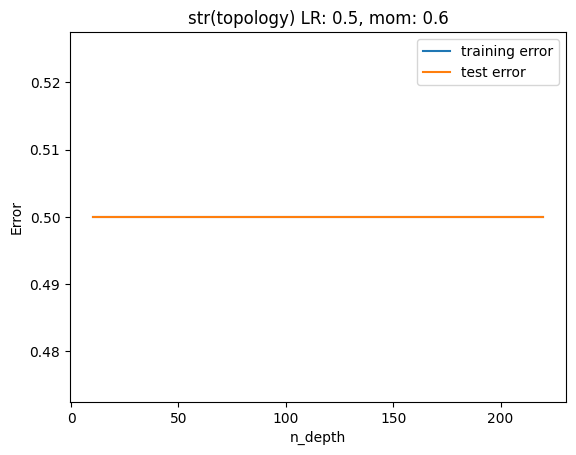

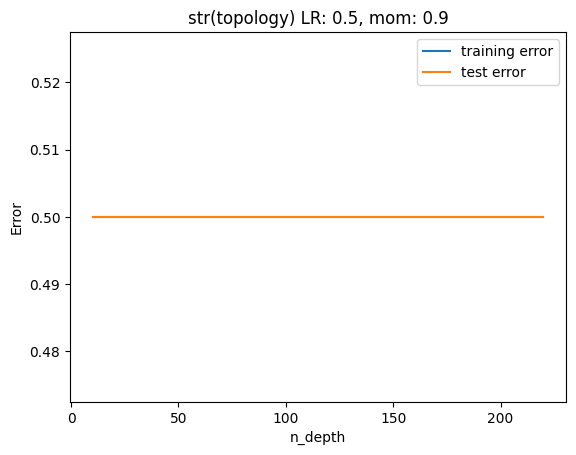

In [16]:
last_expermient_no = 0 # Número del último experimento conducido

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
# Epochs ideal 185
epochs = range(10, 225, 5) # añado un pequeño margen para comprobar que si se entra en overfitting

learning_rate_range = range(1,7,2)
momentum_range = range(3,11,3)

for _lr in learning_rate_range:
    lr = _lr / 10.0
    for _momentum in momentum_range:
        best_acc = -1
        momentum = _momentum / 10.0 if _momentum != 0 else 0
        print(f"================LR: {lr} mom={momentum}=======================")
        training_accuracy = []
        test_accuracy = []
        training_error = []
        test_error = []
        for epoch in epochs:
            clasificador = MLPClassifier(solver='sgd', 
                        hidden_layer_sizes=[8,8,8],
                        max_iter = epoch,
                        random_state=98041,
                        learning_rate_init=lr,
                        momentum=momentum
                        )
            #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
            train_attribute_values = training_set[attributes]
            train_class_values = training_set[class_attribute]
            test_attribute_values = test_set[attributes]
            test_class_values = test_set[class_attribute]
            ################## Modelo ###########################
            model = clasificador.fit(train_attribute_values, train_class_values)
            ################## Clasificar  #################
            predict = model.predict(test_attribute_values)
            ############ Evaluar ###############################
            report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
            report = classification_report(test_class_values, predict, labels=class_attribute_name)
            training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
            if training_accuracy[-1] > best_acc:
                print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
                best_acc = training_accuracy[-1]

            training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))
            test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
            test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
            # print(f"acc={report_dict['accuracy']}")
        plt.figure()
        title = f"str(topology) LR: {lr}, mom: {momentum}"
        plt.title(title)
        plt.plot(epochs, training_error, label="training error")
        plt.plot(epochs, test_error, label="test error")
        plt.ylabel("Error")
        plt.xlabel("n_depth")
        plt.legend()

## Parámetros escogidos

Después de experimentar, los parámetros que me dieron mejores resultados fueron:

- solver = 'lbfgs'
- topología = [8,8,8]
- épocas = 550
- learning rate = N/A
- momentum = N/A


In [17]:

clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[8,8,8],
                    max_iter = 550,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set[attributes]
train_class_values = training_set[class_attribute]
test_attribute_values = test_set[attributes]
test_class_values = test_set[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)

accuracy exacto: 0.8175
                 precision    recall  f1-score   support

tested_positive       0.84      0.78      0.81       200
tested_negative       0.80      0.85      0.82       200

       accuracy                           0.82       400
      macro avg       0.82      0.82      0.82       400
   weighted avg       0.82      0.82      0.82       400

